In [110]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [111]:
data_path = [
    "./data/image1.png",
    "./data/image2.png",
]
size_list = []
data_list = []
for p in data_path:
    img = Image.open(p).convert("L")
    size_list.append(img.size)
    data_list.append(np.array(img).flatten())

data_arr = np.array(data_list)
print(f"number of data = {data_arr.shape[0]}")
print(f"length of each data = {data_arr.shape[1]}")


number of data = 2
length of each data = 262144


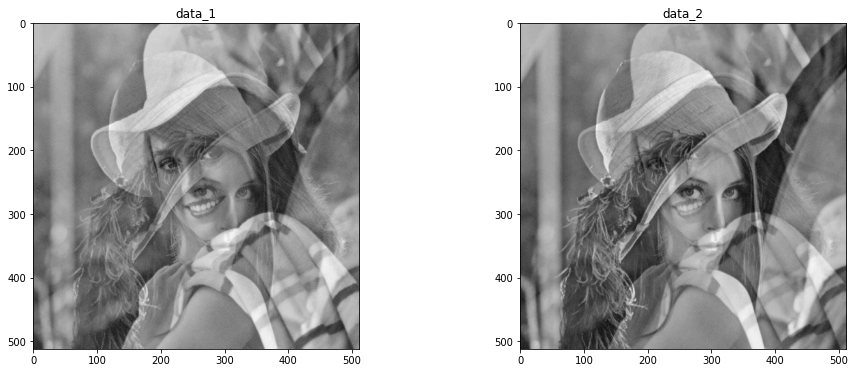

In [112]:
# plot
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(data_arr[0].reshape(size_list[0]), cmap="gray")
ax1.set_title("data_1")
ax2.imshow(data_arr[1].reshape(size_list[1]), cmap="gray")
ax2.set_title("data_2")
plt.savefig("./output/kadai03/image_before.png")
plt.show()


In [113]:
# 平均0になるように観測データを調整
X = np.zeros((data_arr.shape[1], 2))
X[:, 0] = data_arr[0] - data_arr[0].mean()
X[:, 0] /= data_arr[0].std()
X[:, 1] = data_arr[1] - data_arr[1].mean()
X[:, 1] /= data_arr[1].std()

print(f"X.shape = {X.shape}")


X.shape = (262144, 2)


In [114]:
# 共分散行列
sigma = np.zeros((2, 2))
for i in range(2):
    for j in range(2):
        sigma[i, j] = np.mean(X[:, i] * X[:, j])
print(f"sigma.shape = ({sigma.shape[0]}, {sigma.shape[1]})")
sigma


sigma.shape = (2, 2)


array([[1.        , 0.92555599],
       [0.92555599, 1.        ]])

In [115]:
# 対角化
vals, vecs = np.linalg.eig(sigma)
print(f"vals shape = ({vals.shape[0]},)")
print(f"vecs shape = ({vecs.shape[0]}, {vecs.shape[1]})")

E = vecs.copy()
D_sqrt_inv = np.diag(1.0 / np.sqrt(vals))
print(f"D^(-0.5).shape = ({D_sqrt_inv.shape[0]}, {D_sqrt_inv.shape[1]})")
V = E.dot(D_sqrt_inv.dot(E.T))
Z = np.array([V.dot(X[i, :]) for i in range(X.shape[0])])
print(f"Z.shape = {Z.shape}")

print(Z.T.dot(Z) / Z.shape[0])


vals shape = (2,)
vecs shape = (2, 2)
D^(-0.5).shape = (2, 2)
Z.shape = (262144, 2)
[[ 1.00000000e+00 -1.77017689e-15]
 [-1.77017689e-15  1.00000000e+00]]


In [120]:
W = np.zeros((2, 2))
EPS = 1e-3
i = 0
while i < 2:
    print(f"i={i}")
    w = np.random.randn(2, 1) * 100
    w /= np.linalg.norm(w)
    for _ in range(30):
        diff = w.copy()
        wz = np.array([np.dot(w.T, Z[i, :]) for i in range(Z.shape[0])])
        w = np.mean(Z * (wz**3), axis=0, keepdims=True).reshape(2, 1) - 3*w
        w /= np.linalg.norm(w)
        diff -= w.copy()
        if np.linalg.norm(diff) < EPS:
            break
    if i == 0:
        # 最初の復元は必ず採用
        W[i, :] = np.copy(w.T)
        i += 1
        continue

    is_all_different = True
    for j in range(i):
        if np.linalg.norm(W[j, :] - w.T) < 1:
            is_all_different = False
            break

    if is_all_different:
        # got new source
        W[i, :] = np.copy(w.T)
        i += 1


i=0
i=1


In [121]:
Y = np.array([W.dot(Z[i, :]) for i in range(Z.shape[0])])
print(f"Y.shape = {Y.shape}")


Y.shape = (262144, 2)


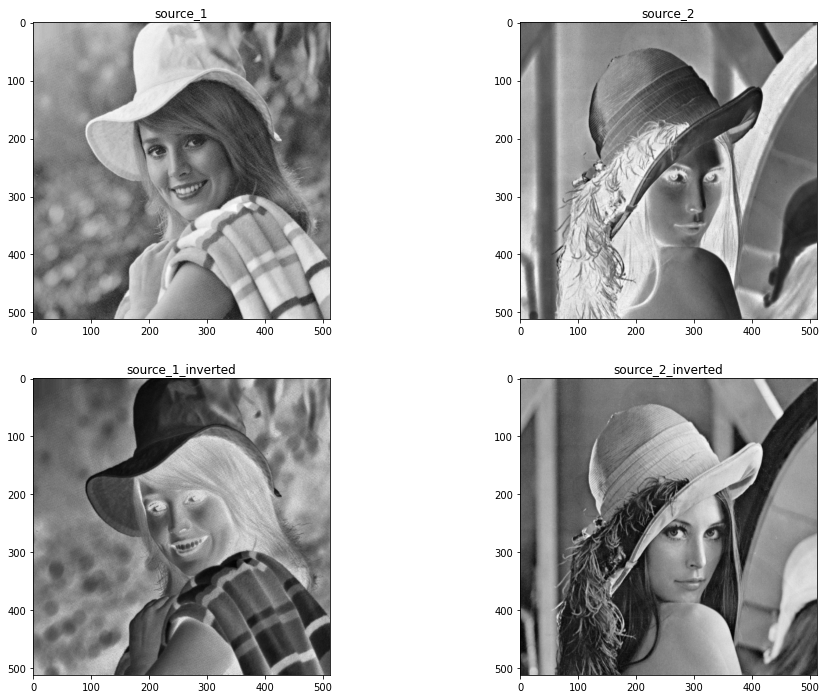

In [125]:
# plot
fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.imshow(Y[:, 0].reshape(size_list[0]), cmap="gray")
ax1.set_title("source_1")
ax3.imshow((np.max(Y[:, 0]) - Y[:, 0]).reshape(size_list[0]), cmap="gray")
ax3.set_title("source_1_inverted")

ax2.imshow(Y[:, 1].reshape(size_list[1]), cmap="gray")
ax2.set_title("source_2")
ax4.imshow((np.max(Y[:, 1]) - Y[:, 1]).reshape(size_list[1]), cmap="gray")
ax4.set_title("source_2_inverted")

plt.savefig("./output/kadai03/image_after.png")
plt.show()
